## 3. Weather_Incheon_Profiling

### 임포트하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# '-'(마이너스) 기호 깨짐 예방
plt.rcParams['axes.unicode_minus'] = False

# jupyter notebook 에서 창 내부에 출력
%matplotlib inline

# 별도 창에 출력
# %matplotlib tk

## 1. 데이터 읽기

#### 1) 데이터 읽기

In [2]:
df = pd.read_csv('./datasets/OBS_ASOS_TIM_20220929194644.csv', encoding='cp949')

#### 2) 데이터 출력하기

In [3]:
# 데이터 출력
df

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,112,인천,2021-01-01 00:00,-7.5,NaN,NaN,9.0,2.0,NaN,20,...,NaN,1657,NaN,NaN,-8.7,NaN,-1.2,0.2,1.3,2.3
1,112,인천,2021-01-01 01:00,-7.8,NaN,NaN,NaN,1.9,NaN,50,...,NaN,1852,NaN,NaN,-8.7,NaN,-1.2,0.2,1.3,2.4
2,112,인천,2021-01-01 02:00,-7.8,NaN,NaN,NaN,1.0,NaN,20,...,NaN,1745,NaN,NaN,-9.0,NaN,-1.3,0.1,1.3,2.2
3,112,인천,2021-01-01 03:00,-8.0,NaN,NaN,NaN,1.9,NaN,50,...,NaN,1950,NaN,NaN,-9.0,NaN,-1.4,0.1,1.2,2.2
4,112,인천,2021-01-01 04:00,-7.9,NaN,NaN,NaN,1.9,NaN,70,...,NaN,1937,NaN,NaN,-9.0,NaN,-1.5,0.0,1.2,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,112,인천,2021-12-31 19:00,-5.4,NaN,NaN,NaN,5.0,NaN,320,...,NaN,2000,NaN,NaN,-7.1,NaN,-0.7,-0.4,0.5,1.5
8756,112,인천,2021-12-31 20:00,-5.8,NaN,NaN,NaN,5.5,NaN,320,...,NaN,2000,NaN,NaN,-7.5,NaN,-0.9,-0.4,0.5,1.5
8757,112,인천,2021-12-31 21:00,-6.7,NaN,NaN,NaN,4.4,NaN,340,...,NaN,2000,NaN,NaN,-8.3,NaN,-1.0,-0.5,0.4,1.4
8758,112,인천,2021-12-31 22:00,-7.2,NaN,NaN,NaN,3.2,NaN,360,...,NaN,2000,NaN,NaN,-8.7,NaN,-1.2,-0.5,0.4,1.5


#### 3) 데이터 확인

In [4]:
# 자료형 확인
type(df)

pandas.core.frame.DataFrame

In [5]:
# 데이터 크기 확인
df.shape

(8760, 38)

In [6]:
# 데이터 차원 확인
df.ndim

2

In [7]:
# 데이터 갯수 확인
df.size

332880

In [8]:
# 컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8760 non-null   int64  
 1   지점명            8760 non-null   object 
 2   일시             8760 non-null   object 
 3   기온(°C)         8760 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        925 non-null    float64
 6   강수량 QC플래그      1798 non-null   float64
 7   풍속(m/s)        8760 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       8760 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          8760 non-null   float64
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8760 non-null   float64
 14  이슬점온도(°C)      8760 non-null   float64
 15  현지기압(hPa)      8760 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8760 non-null   float64
 18  해면기압 QC플

In [9]:
# 컬럼 확인
df.columns

Index(['지점', '지점명', '일시', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그',
       '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)',
       '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)',
       '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )',
       '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그',
       '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [10]:
# 인덱스 확인
df.index

RangeIndex(start=0, stop=8760, step=1)

## 2. 데이터 준비

### 1) 시계열 데이터로 변환

In [11]:
# object인 '일시' 컬럼을 datetime형으로 변환
df.index = pd.to_datetime(df['일시'])
df = df.drop(['일시'], axis=1)
df

,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,112,인천,-7.5,NaN,NaN,9.0,2.0,NaN,20,NaN,...,NaN,1657,NaN,NaN,-8.7,NaN,-1.2,0.2,1.3,2.3
2021-01-01 01:00:00,112,인천,-7.8,NaN,NaN,NaN,1.9,NaN,50,NaN,...,NaN,1852,NaN,NaN,-8.7,NaN,-1.2,0.2,1.3,2.4
2021-01-01 02:00:00,112,인천,-7.8,NaN,NaN,NaN,1.0,NaN,20,NaN,...,NaN,1745,NaN,NaN,-9.0,NaN,-1.3,0.1,1.3,2.2
2021-01-01 03:00:00,112,인천,-8.0,NaN,NaN,NaN,1.9,NaN,50,NaN,...,NaN,1950,NaN,NaN,-9.0,NaN,-1.4,0.1,1.2,2.2
2021-01-01 04:00:00,112,인천,-7.9,NaN,NaN,NaN,1.9,NaN,70,NaN,...,NaN,1937,NaN,NaN,-9.0,NaN,-1.5,0.0,1.2,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,112,인천,-5.4,NaN,NaN,NaN,5.0,NaN,320,NaN,...,NaN,2000,NaN,NaN,-7.1,NaN,-0.7,-0.4,0.5,1.5
2021-12-31 20:00:00,112,인천,-5.8,NaN,NaN,NaN,5.5,NaN,320,NaN,...,NaN,2000,NaN,NaN,-7.5,NaN,-0.9,-0.4,0.5,1.5
2021-12-31 21:00:00,112,인천,-6.7,NaN,NaN,NaN,4.4,NaN,340,NaN,...,NaN,2000,NaN,NaN,-8.3,NaN,-1.0,-0.5,0.4,1.4


### 2) 데이터 정제

#### 기술통계로 결측치, 이상치 확인

In [12]:
# row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [13]:
df.describe()

,지점,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
count,8760.0,8760.000000,0.0,925.000000,1798.0,8760.000000,0.0,8760.000000,0.0,8760.000000,0.0,8760.000000,8760.000000,8760.000000,0.0,8760.000000,0.0,4795.000000,3965.0,4795.000000,3966.0,282.000000,25.000000,8757.000000,8759.000000,4392.000000,8760.000000,0.0,3.618000e+03,8760.000000,26.0,8760.000000,8760.000000,8760.000000,8760.000000
mean,112.0,13.403733,NaN,1.158703,9.0,2.889669,NaN,208.254566,NaN,61.924418,NaN,11.472043,5.652580,1008.023619,NaN,1016.282877,NaN,0.536663,9.0,1.073255,9.0,1.283333,0.916000,5.026265,2.917570,14.628871,1384.935959,NaN,3.362777e+04,14.469315,0.0,14.619658,14.370240,14.495879,14.644349
std,0.0,10.446387,NaN,2.840931,0.0,1.558965,NaN,106.568931,NaN,17.859953,NaN,7.276103,11.290302,7.975891,NaN,8.276116,NaN,0.451857,0.0,0.937631,0.0,1.253396,1.207159,3.955294,3.485927,13.841780,671.558151,NaN,7.129217e+05,12.227769,0.0,9.724530,9.400064,9.046195,8.711304
min,112.0,-17.500000,NaN,0.000000,9.0,0.000000,NaN,0.000000,NaN,10.000000,NaN,0.600000,-28.300000,987.600000,NaN,995.500000,NaN,0.000000,9.0,0.000000,9.0,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,NaN,1.000000e+00,-13.900000,0.0,-3.500000,-1.400000,-0.200000,0.600000
25%,112.0,5.900000,NaN,0.000000,9.0,1.800000,NaN,140.000000,NaN,48.000000,NaN,5.600000,-1.200000,1001.800000,NaN,1009.800000,NaN,0.000000,9.0,0.230000,9.0,0.300000,0.000000,0.000000,0.000000,6.000000,784.750000,NaN,1.900000e+01,4.700000,0.0,6.000000,5.800000,6.300000,6.700000
50%,112.0,13.800000,NaN,0.100000,9.0,2.600000,NaN,230.000000,NaN,62.000000,NaN,9.500000,6.200000,1008.300000,NaN,1016.500000,NaN,0.700000,9.0,0.860000,9.0,0.800000,0.400000,6.000000,1.000000,10.000000,1651.000000,NaN,4.000000e+01,14.600000,0.0,14.800000,14.400000,14.500000,14.800000
75%,112.0,22.200000,NaN,0.900000,9.0,3.700000,NaN,290.000000,NaN,76.000000,NaN,17.700000,15.600000,1014.000000,NaN,1022.500000,NaN,1.000000,9.0,1.750000,9.0,1.500000,1.500000,9.000000,6.000000,16.000000,2000.000000,NaN,4.200000e+01,23.000000,0.0,23.200000,22.900000,22.900000,22.800000
max,112.0,34.000000,NaN,37.400000,9.0,12.400000,NaN,360.000000,NaN,97.000000,NaN,29.800000,24.000000,1027.900000,NaN,1037.200000,NaN,1.000000,9.0,3.580000,9.0,5.000000,4.800000,10.000000,10.000000,76.000000,5000.000000,NaN,1.916020e+07,57.000000,0.0,34.300000,31.900000,30.600000,29.500000


#### 결측치 확인

In [14]:
df.isnull()

,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,False,False,False,True,True,False,False,True,False,True,False,True,False,False,False,True,False,True,True,False,True,False,True,True,False,False,True,True,False,True,True,False,True,False,False,False,False
2021-01-01 01:00:00,False,False,False,True,True,True,False,True,False,True,False,True,False,False,False,True,False,True,True,False,True,False,True,True,False,False,True,True,False,True,True,False,True,False,False,False,False
2021-01-01 02:00:00,False,False,False,True,True,True,False,True,False,True,False,True,False,False,False,True,False,True,True,False,True,False,True,True,False,False,True,True,False,True,True,False,True,False,False,False,False
2021-01-01 03:00:00,False,False,False,True,True,True,False,True,False,True,False,True,False,False,False,True,False,True,True,False,True,False,True,True,False,False,True,True,False,True,True,False,True,False,False,False,False
2021-01-01 04:00:00,False,False,False,True,True,True,False,True,False,True,False,True,False,False,False,True,False,True,True,False,True,False,True,True,False,False,True,True,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,False,False,False,True,True,True,False,True,False,True,False,True,False,False,False,True,False,True,True,False,True,False,True,True,False,False,True,True,False,True,True,False,True,False,False,False,False
2021-12-31 20:00:00,False,False,False,True,True,True,False,True,False,True,False,True,False,False,False,True,False,True,True,False,True,False,True,True,False,False,True,True,False,True,True,False,True,False,False,False,False
2021-12-31 21:00:00,False,False,False,True,True,True,False,True,False,True,False,True,False,False,False,True,False,True,True,False,True,False,True,True,False,False,True,True,False,True,True,False,True,False,False,False,False


In [15]:
#결측치 수
df.isnull().sum()

지점                  0
지점명                 0
기온(°C)              0
기온 QC플래그         8760
강수량(mm)          7835
강수량 QC플래그        6962
풍속(m/s)             0
풍속 QC플래그         8760
풍향(16방위)            0
풍향 QC플래그         8760
습도(%)               0
습도 QC플래그         8760
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그       8760
해면기압(hPa)           0
해면기압 QC플래그       8760
일조(hr)           3965
일조 QC플래그         4795
일사(MJ/m2)        3965
일사 QC플래그         4794
적설(cm)           8478
3시간신적설(cm)       8735
전운량(10분위)           3
중하층운량(10분위)         1
운형(운형약어)         3913
최저운고(100m )      4368
시정(10m)             0
지면상태(지면상태코드)     8760
현상번호(국내식)        5142
지면온도(°C)            0
지면온도 QC플래그       8734
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

In [16]:
df.isnull().sum().sum()

133010

#### 결측치 시각화

In [17]:
# pip install missingno
import missingno as msno

<AxesSubplot:>

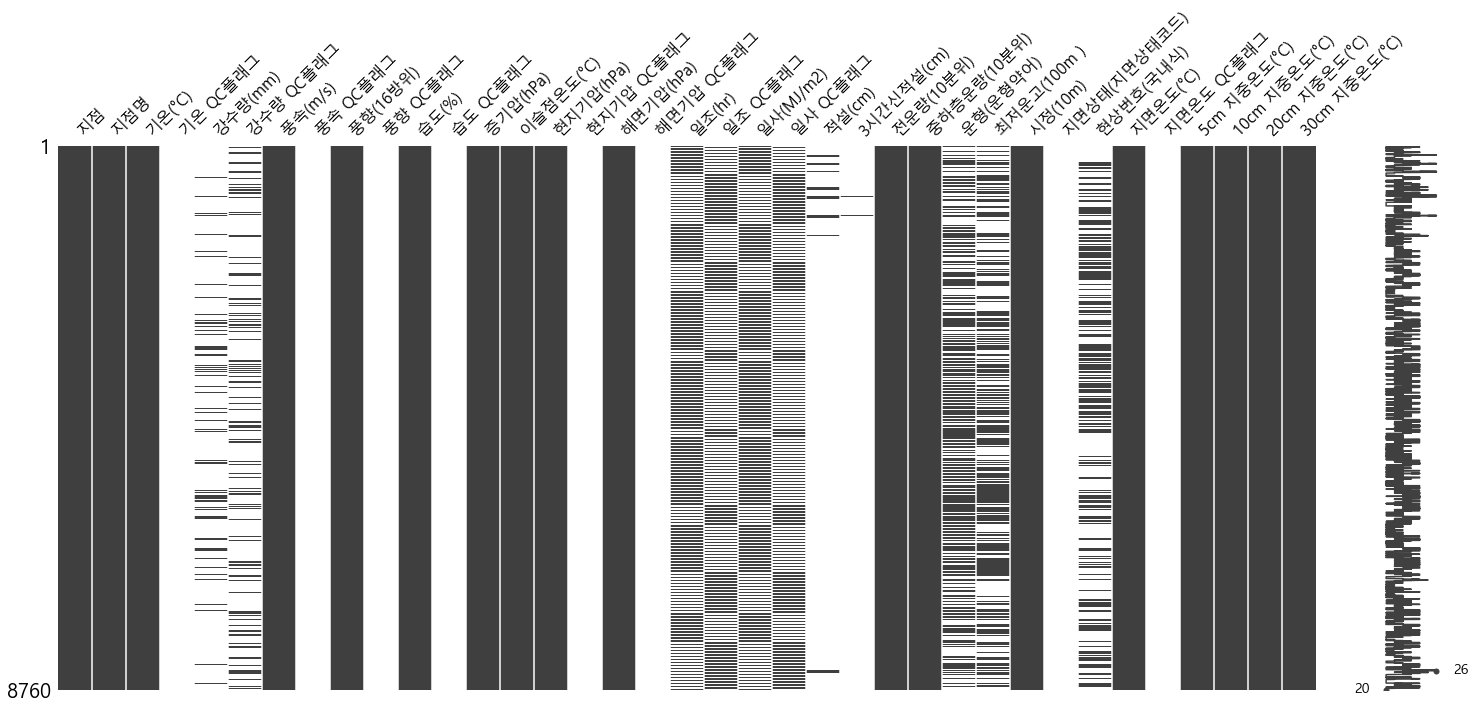

In [18]:
msno.matrix(df)

<AxesSubplot:>

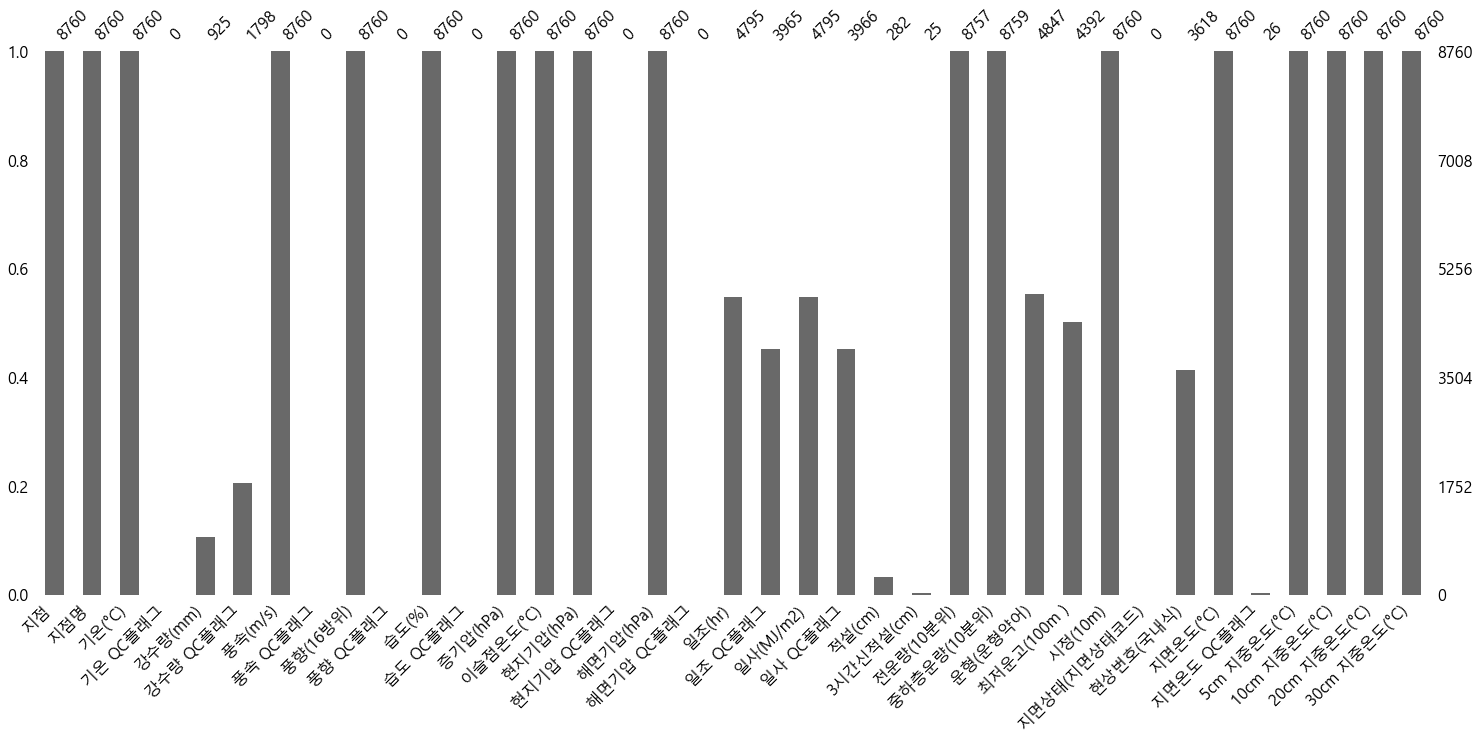

In [19]:
msno.bar(df)

#### 결측치 채우기

In [20]:
# 결측치 삭제 : 행 삭제
df.dropna()

,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [21]:
# 결측치 삭제 : 열 삭제
df.dropna(axis=1)

,지점,지점명,기온(°C),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,112,인천,-7.5,2.0,20,62.0,2.2,-13.5,1018.4,1027.4,1657,-8.7,-1.2,0.2,1.3,2.3
2021-01-01 01:00:00,112,인천,-7.8,1.9,50,63.0,2.1,-13.6,1018.3,1027.4,1852,-8.7,-1.2,0.2,1.3,2.4
2021-01-01 02:00:00,112,인천,-7.8,1.0,20,61.0,2.1,-14.0,1018.3,1027.4,1745,-9.0,-1.3,0.1,1.3,2.2
2021-01-01 03:00:00,112,인천,-8.0,1.9,50,60.0,2.0,-14.4,1018.6,1027.7,1950,-9.0,-1.4,0.1,1.2,2.2
2021-01-01 04:00:00,112,인천,-7.9,1.9,70,58.0,2.0,-14.7,1017.8,1026.9,1937,-9.0,-1.5,0.0,1.2,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,112,인천,-5.4,5.0,320,30.0,1.2,-20.2,1023.3,1032.3,2000,-7.1,-0.7,-0.4,0.5,1.5
2021-12-31 20:00:00,112,인천,-5.8,5.5,320,34.0,1.4,-19.1,1023.3,1032.3,2000,-7.5,-0.9,-0.4,0.5,1.5
2021-12-31 21:00:00,112,인천,-6.7,4.4,340,36.0,1.3,-19.3,1023.4,1032.5,2000,-8.3,-1.0,-0.5,0.4,1.4


In [22]:
# 결측치 채우기 : 0값으로 채우기
df.fillna(0).head()

,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,112,인천,-7.5,0.0,0.0,9.0,2.0,0.0,20,0.0,62.0,0.0,2.2,-13.5,1018.4,0.0,1027.4,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0,0.0,1657,0.0,0.0,-8.7,0.0,-1.2,0.2,1.3,2.3
2021-01-01 01:00:00,112,인천,-7.8,0.0,0.0,0.0,1.9,0.0,50,0.0,63.0,0.0,2.1,-13.6,1018.3,0.0,1027.4,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0,0.0,1852,0.0,0.0,-8.7,0.0,-1.2,0.2,1.3,2.4
2021-01-01 02:00:00,112,인천,-7.8,0.0,0.0,0.0,1.0,0.0,20,0.0,61.0,0.0,2.1,-14.0,1018.3,0.0,1027.4,0.0,0.0,9.0,0.0,9.0,0.0,0.0,2.0,0.0,0,0.0,1745,0.0,0.0,-9.0,0.0,-1.3,0.1,1.3,2.2
2021-01-01 03:00:00,112,인천,-8.0,0.0,0.0,0.0,1.9,0.0,50,0.0,60.0,0.0,2.0,-14.4,1018.6,0.0,1027.7,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0,0.0,1950,0.0,0.0,-9.0,0.0,-1.4,0.1,1.2,2.2
2021-01-01 04:00:00,112,인천,-7.9,0.0,0.0,0.0,1.9,0.0,70,0.0,58.0,0.0,2.0,-14.7,1017.8,0.0,1026.9,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0,0.0,1937,0.0,0.0,-9.0,0.0,-1.5,0.0,1.2,2.2


In [23]:
# 결측치 채우기: 보간(이전값), 열 기준
df.fillna(method='ffill').head()

,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,112,인천,-7.5,NaN,NaN,9.0,2.0,NaN,20,NaN,62.0,NaN,2.2,-13.5,1018.4,NaN,1027.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0.0,NaN,NaN,1657,NaN,NaN,-8.7,NaN,-1.2,0.2,1.3,2.3
2021-01-01 01:00:00,112,인천,-7.8,NaN,NaN,9.0,1.9,NaN,50,NaN,63.0,NaN,2.1,-13.6,1018.3,NaN,1027.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0.0,NaN,NaN,1852,NaN,NaN,-8.7,NaN,-1.2,0.2,1.3,2.4
2021-01-01 02:00:00,112,인천,-7.8,NaN,NaN,9.0,1.0,NaN,20,NaN,61.0,NaN,2.1,-14.0,1018.3,NaN,1027.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,2.0,0.0,NaN,NaN,1745,NaN,NaN,-9.0,NaN,-1.3,0.1,1.3,2.2
2021-01-01 03:00:00,112,인천,-8.0,NaN,NaN,9.0,1.9,NaN,50,NaN,60.0,NaN,2.0,-14.4,1018.6,NaN,1027.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0.0,NaN,NaN,1950,NaN,NaN,-9.0,NaN,-1.4,0.1,1.2,2.2
2021-01-01 04:00:00,112,인천,-7.9,NaN,NaN,9.0,1.9,NaN,70,NaN,58.0,NaN,2.0,-14.7,1017.8,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0.0,NaN,NaN,1937,NaN,NaN,-9.0,NaN,-1.5,0.0,1.2,2.2


In [24]:
# 결측치 채우기: 보간(이전값), 행 기준
df.fillna(method='ffill', axis=1).head()

,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,112,인천,-7.5,-7.5,-7.5,9.0,2.0,2.0,20,20,62.0,62.0,2.2,-13.5,1018.4,1018.4,1027.4,1027.4,1027.4,9.0,9.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0,1657,1657,1657,-8.7,-8.7,-1.2,0.2,1.3,2.3
2021-01-01 01:00:00,112,인천,-7.8,-7.8,-7.8,-7.8,1.9,1.9,50,50,63.0,63.0,2.1,-13.6,1018.3,1018.3,1027.4,1027.4,1027.4,9.0,9.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0,1852,1852,1852,-8.7,-8.7,-1.2,0.2,1.3,2.4
2021-01-01 02:00:00,112,인천,-7.8,-7.8,-7.8,-7.8,1.0,1.0,20,20,61.0,61.0,2.1,-14.0,1018.3,1018.3,1027.4,1027.4,1027.4,9.0,9.0,9.0,9.0,9.0,2.0,0.0,0.0,0.0,1745,1745,1745,-9.0,-9.0,-1.3,0.1,1.3,2.2
2021-01-01 03:00:00,112,인천,-8.0,-8.0,-8.0,-8.0,1.9,1.9,50,50,60.0,60.0,2.0,-14.4,1018.6,1018.6,1027.7,1027.7,1027.7,9.0,9.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0,1950,1950,1950,-9.0,-9.0,-1.4,0.1,1.2,2.2
2021-01-01 04:00:00,112,인천,-7.9,-7.9,-7.9,-7.9,1.9,1.9,70,70,58.0,58.0,2.0,-14.7,1017.8,1017.8,1026.9,1026.9,1026.9,9.0,9.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0,1937,1937,1937,-9.0,-9.0,-1.5,0.0,1.2,2.2


In [25]:
# 결측치 채우기: 선형 보간, 행 기준 - 오류
#df.interpolate(method='linear', axis=1).head()

#### 이상치

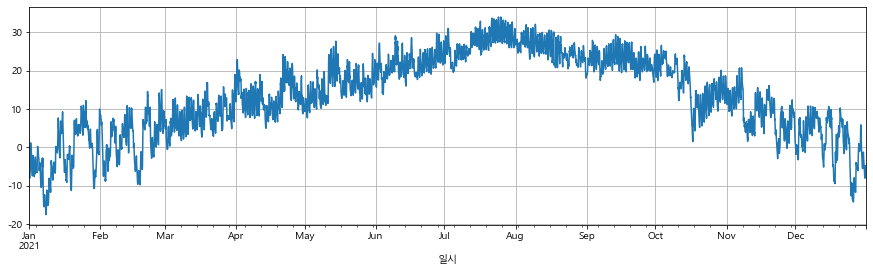

In [26]:
# 시각적으로 찾기
plt.figure(figsize=(15,4))
df['기온(°C)'].plot()
plt.grid()

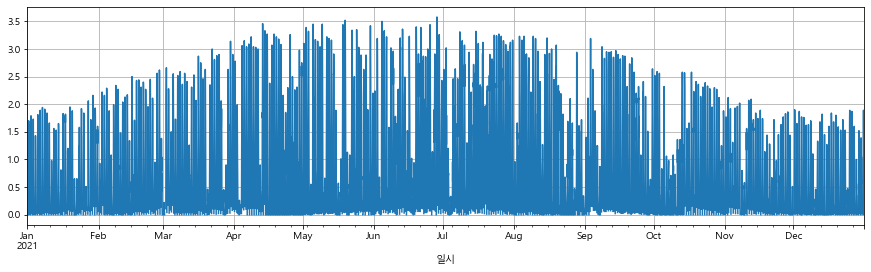

In [27]:
# 시각적으로 찾기
plt.figure(figsize=(15,4))
df['일사(MJ/m2)'].plot()
plt.grid()

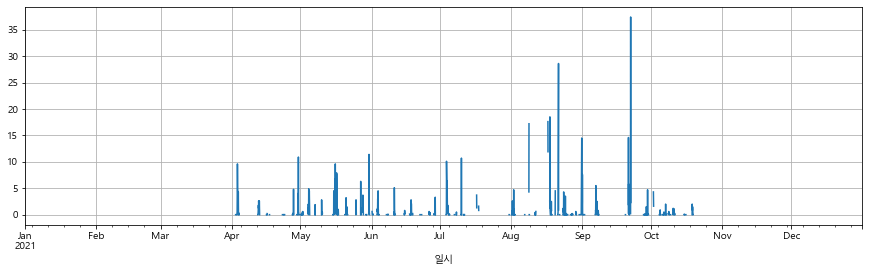

In [28]:
# 시각적으로 찾기
plt.figure(figsize=(15,4))
df['강수량(mm)'].plot()
plt.grid()

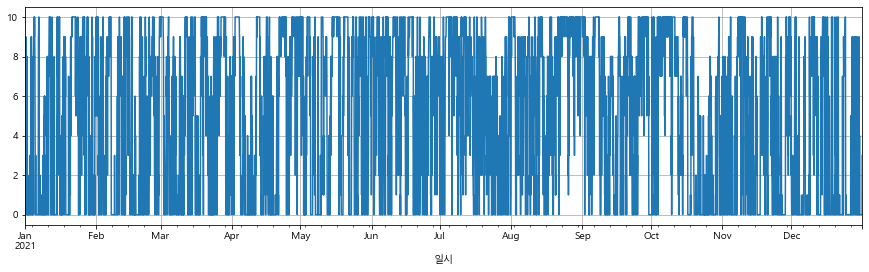

In [29]:
# 시각적으로 찾기
plt.figure(figsize=(15,4))
df['전운량(10분위)'].plot()
plt.grid()

In [30]:
# 특정 범위로 찾기
np.abs(df['기온(°C)']) > 45

일시
2021-01-01 00:00:00    False
2021-01-01 01:00:00    False
2021-01-01 02:00:00    False
2021-01-01 03:00:00    False
2021-01-01 04:00:00    False
                       ...  
2021-12-31 19:00:00    False
2021-12-31 20:00:00    False
2021-12-31 21:00:00    False
2021-12-31 22:00:00    False
2021-12-31 23:00:00    False
Name: 기온(°C), Length: 8760, dtype: bool

In [31]:
# 특정 범위 개수로 찾기
(np.abs(df['기온(°C)']) > 45).sum()

0

In [32]:
# NaN 값으로 바꾸기
idx = np.abs(df['기온(°C)']) > 45
df['기온(°C)'][idx] = np.nan

C:\Users\82107\AppData\Local\Temp\ipykernel_14308\2344861117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['기온(°C)'][idx] = np.nan


#### 기온

In [33]:
# 기온 결측치 찾기
df['기온(°C)'].isnull().sum()

0

In [34]:
# 기온 결측치 인덱스
idx = df['기온(°C)'].isnull()
df[idx]['기온(°C)']

Series([], Name: 기온(°C), dtype: float64)

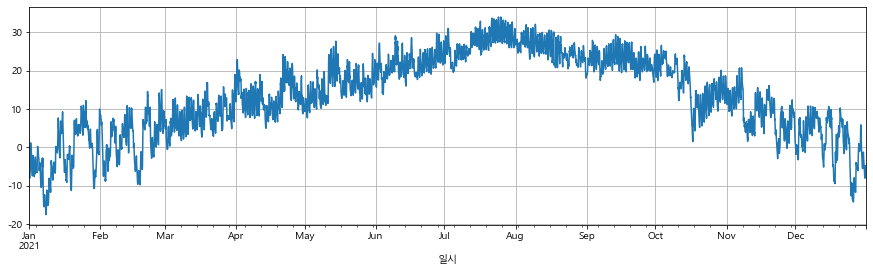

In [35]:
# 기온 시각화
plt.figure(figsize=(15,4))
df['기온(°C)'].plot()
plt.grid()

#### 일사량

In [36]:
# 일사량 결측치 찾기
df['일사(MJ/m2)'].isnull().sum()

3965

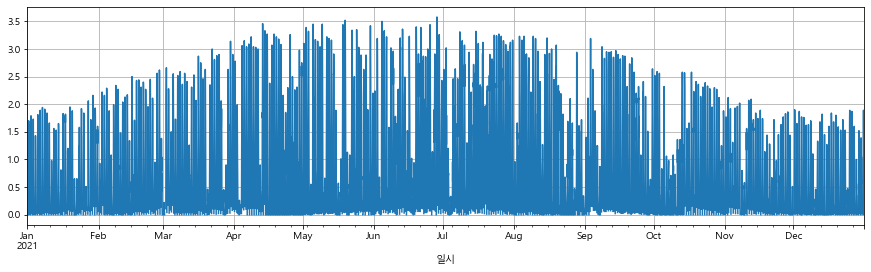

In [37]:
# 일사량 시각화-결측치 채우기 전
plt.figure(figsize=(15,4))
df['일사(MJ/m2)'].plot()
plt.grid()

In [38]:
# 일사량 결측치 인덱스
idx = df['일사(MJ/m2)'].isnull()
df[idx]['일사(MJ/m2)']

일시
2021-01-01 00:00:00   NaN
2021-01-01 01:00:00   NaN
2021-01-01 02:00:00   NaN
2021-01-01 03:00:00   NaN
2021-01-01 04:00:00   NaN
                       ..
2021-12-31 19:00:00   NaN
2021-12-31 20:00:00   NaN
2021-12-31 21:00:00   NaN
2021-12-31 22:00:00   NaN
2021-12-31 23:00:00   NaN
Name: 일사(MJ/m2), Length: 3965, dtype: float64

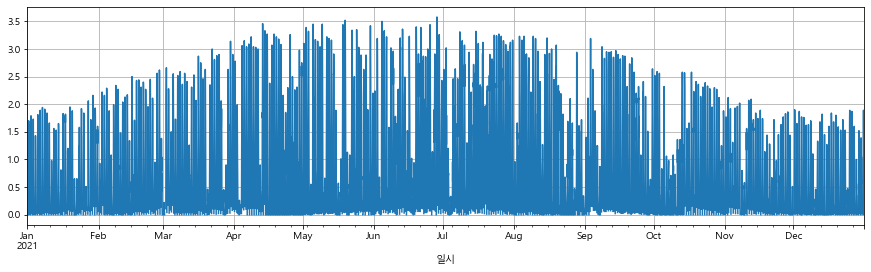

In [39]:
# 일사량 시각화
plt.figure(figsize=(15,4))
df['일사(MJ/m2)'].plot()
plt.grid()

In [40]:
# 일사량 결측치 0값 대치
df['일사(MJ/m2)'] = df['일사(MJ/m2)'].fillna(0)
df[idx]['일사(MJ/m2)']

일시
2021-01-01 00:00:00    0.0
2021-01-01 01:00:00    0.0
2021-01-01 02:00:00    0.0
2021-01-01 03:00:00    0.0
2021-01-01 04:00:00    0.0
                      ... 
2021-12-31 19:00:00    0.0
2021-12-31 20:00:00    0.0
2021-12-31 21:00:00    0.0
2021-12-31 22:00:00    0.0
2021-12-31 23:00:00    0.0
Name: 일사(MJ/m2), Length: 3965, dtype: float64

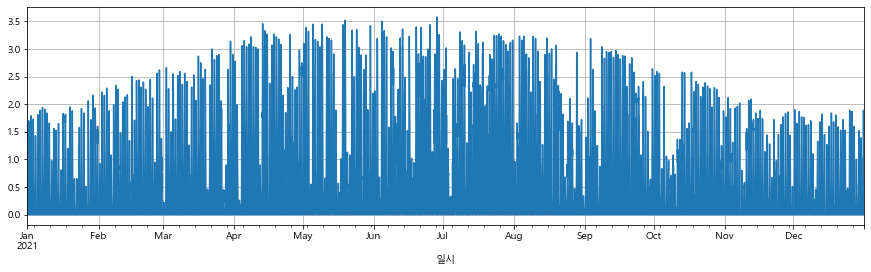

In [41]:
plt.figure(figsize=(15,4))
df['일사(MJ/m2)'].plot()
plt.grid()

In [42]:
df['일사(MJ/m2)'].isnull().sum()

0

#### 강수량

In [43]:
# 강수량 결측치 찾기
df['강수량(mm)'].isnull().sum()

7835

In [44]:
# 강수량 결측치 인덱스
idx = df['강수량(mm)'].isnull()
df[idx]['강수량(mm)']

일시
2021-01-01 00:00:00   NaN
2021-01-01 01:00:00   NaN
2021-01-01 02:00:00   NaN
2021-01-01 03:00:00   NaN
2021-01-01 04:00:00   NaN
                       ..
2021-12-31 19:00:00   NaN
2021-12-31 20:00:00   NaN
2021-12-31 21:00:00   NaN
2021-12-31 22:00:00   NaN
2021-12-31 23:00:00   NaN
Name: 강수량(mm), Length: 7835, dtype: float64

In [45]:
# 강수량 결측치 0값 대치
df['강수량(mm)'] = df['강수량(mm)'].fillna(0)
df[idx]['강수량(mm)']

일시
2021-01-01 00:00:00    0.0
2021-01-01 01:00:00    0.0
2021-01-01 02:00:00    0.0
2021-01-01 03:00:00    0.0
2021-01-01 04:00:00    0.0
                      ... 
2021-12-31 19:00:00    0.0
2021-12-31 20:00:00    0.0
2021-12-31 21:00:00    0.0
2021-12-31 22:00:00    0.0
2021-12-31 23:00:00    0.0
Name: 강수량(mm), Length: 7835, dtype: float64

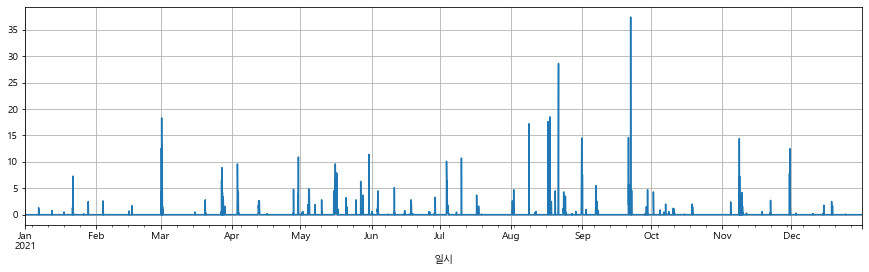

In [46]:
# 강수량 시각화
plt.figure(figsize=(15,4))
df['강수량(mm)'].plot()
plt.grid()

#### 운량

In [47]:
# 운량 결측치 찾기
df['전운량(10분위)'].isnull().sum()

3

In [48]:
# 운량 결측치 0값 대치
df['전운량(10분위)'] = df['전운량(10분위)'].fillna(0)

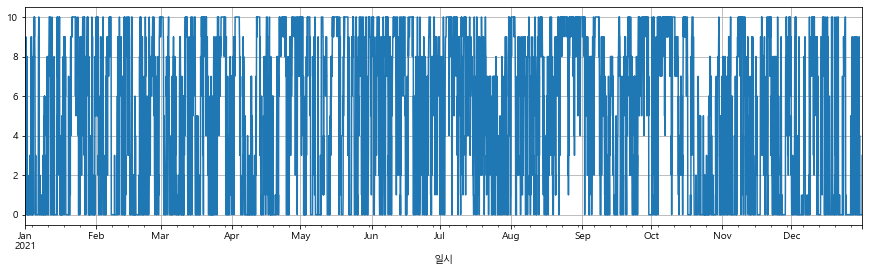

In [49]:
# 운량 시각화
plt.figure(figsize=(15,4))
df['전운량(10분위)'].plot()
plt.grid()

#### 적설

In [50]:
# 적설 결측치 찾기
df['적설(cm)'].isnull().sum()

8478

In [51]:
# 적설 결측치 0값 대치
df['적설(cm)'] = df['적설(cm)'].fillna(0)

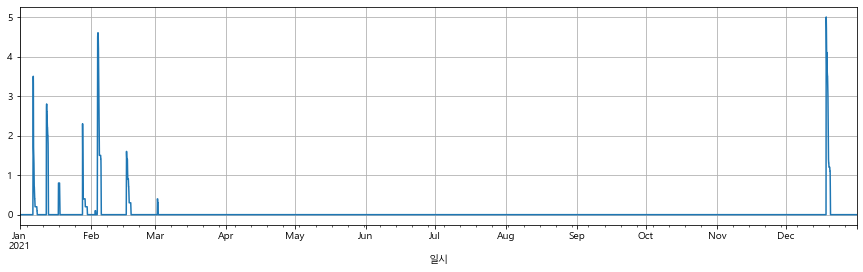

In [52]:
# 적설 시각화
plt.figure(figsize=(15,4))
df['적설(cm)'].plot()
plt.grid()

In [53]:
df2 = df[['기온(°C)', '일사(MJ/m2)','전운량(10분위)', '강수량(mm)', '적설(cm)']]
df2

,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm)
일시,,,,,
2021-01-01 00:00:00,-7.5,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,-7.8,0.0,0.0,0.0,0.0
2021-01-01 02:00:00,-7.8,0.0,2.0,0.0,0.0
2021-01-01 03:00:00,-8.0,0.0,0.0,0.0,0.0
2021-01-01 04:00:00,-7.9,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-12-31 19:00:00,-5.4,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,-5.8,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,-6.7,0.0,0.0,0.0,0.0


#### csv 파일로 저장

In [54]:
df2.to_csv('OBS_ASOS_TIM_2021_1H_Tem_Irr.csv', encoding='cp949')

## 3.데이터 분석 및 시각화

#### 데이터 플라임 생성

In [56]:
pd.date_range('2021-01-01', '2021-12-31', freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [55]:
df2_T = pd.DataFrame(df['기온(°C)'].values.reshape(int(len(df['기온(°C)'].values)/24),24),
                   index = pd.date_range('2021-01-01', '2021-12-31', freq='D'), 
                   columns = np.arange(0,24))
df2_T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
2021-01-01,-7.5,-7.8,-7.8,-8.0,-7.9,-7.9,-7.5,-6.9,-6.7,-6.0,-4.1,-2.2,-1.2,0.1,1.2,0.8,-0.3,-0.4,-0.7,-0.7,-1.3,-1.2,-1.7,-2.3
2021-01-02,-3.3,-4.2,-5.0,-5.6,-6.2,-6.3,-6.4,-7.1,-7.4,-6.8,-5.5,-5.0,-3.8,-2.7,-2.3,-2.1,-2.2,-2.7,-3.1,-3.3,-3.5,-4.2,-5.0,-5.5
2021-01-03,-6.0,-6.6,-6.7,-6.8,-7.6,-7.3,-6.5,-6.3,-6.9,-6.1,-4.8,-3.8,-3.4,-2.5,-2.5,-2.5,-2.5,-2.8,-3.7,-4.3,-4.3,-4.8,-4.9,-5.0
2021-01-04,-5.5,-6.1,-6.4,-6.4,-6.4,-6.5,-6.5,-6.4,-6.5,-5.4,-4.1,-2.7,-1.5,-0.5,0.2,0.3,-0.2,-0.5,-1.0,-1.0,-0.9,-0.9,-0.9,-1.9
2021-01-05,-2.4,-2.5,-2.5,-2.7,-3.1,-4.0,-4.6,-5.4,-6.0,-5.6,-5.2,-4.7,-4.6,-4.2,-4.4,-4.3,-4.0,-4.9,-5.6,-6.0,-6.9,-7.7,-8.5,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-11.1,-10.9,-11.3,-11.2,-11.3,-11.4,-11.5,-11.7,-11.3,-8.8,-6.4,-4.6,-3.9,-4.3,-4.4,-4.4,-4.2,-4.3,-4.8,-4.7,-4.5,-4.7,-4.8,-4.9
2021-12-28,-4.9,-5.2,-5.3,-5.3,-5.7,-6.0,-5.9,-6.0,-5.6,-4.8,-3.0,-1.5,-1.1,-0.5,0.0,0.5,1.0,0.9,0.7,0.4,-0.1,-0.4,-0.7,-0.7
2021-12-29,-1.0,-1.0,-0.7,-0.5,0.0,0.0,0.1,0.0,0.0,0.5,2.5,3.0,5.2,5.9,5.9,5.7,5.1,4.8,2.7,1.9,0.0,-0.9,-1.3,-1.6
2021-12-30,-2.1,-2.8,-3.6,-4.3,-4.7,-4.9,-5.2,-5.5,-5.5,-4.8,-3.7,-2.5,-1.6,-2.0,-2.6,-1.5,-1.2,-1.8,-2.1,-2.6,-3.7,-4.0,-4.2,-4.5


In [57]:
df2_I = pd.DataFrame(df['일사(MJ/m2)'].values.reshape(int(len(df['일사(MJ/m2)'].values)/24),24),
                   index = pd.date_range('2021-01-01', '2021-12-31', freq='D'), 
                   columns = np.arange(0,24))
df2_I

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.65,1.20,1.48,1.70,1.64,1.35,0.51,0.15,0.01,0.0,0.0,0.0,0.0,0.0
2021-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.80,1.34,1.66,1.79,1.69,1.42,0.94,0.38,0.02,0.0,0.0,0.0,0.0,0.0
2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.75,1.26,1.42,1.73,1.38,0.65,0.48,0.29,0.01,0.0,0.0,0.0,0.0,0.0
2021-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.52,1.03,1.43,1.30,1.06,0.65,0.39,0.16,0.02,0.0,0.0,0.0,0.0,0.0
2021-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.80,1.35,1.67,1.81,1.47,1.01,1.00,0.46,0.03,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.26,0.82,1.29,1.60,1.01,0.62,0.38,0.23,0.23,0.02,0.0,0.0,0.0,0.0,0.0
2021-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.75,1.00,0.56,0.51,0.39,0.33,0.33,0.15,0.01,0.0,0.0,0.0,0.0,0.0
2021-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.56,0.44,1.31,1.52,1.48,1.18,0.26,0.16,0.02,0.0,0.0,0.0,0.0,0.0
2021-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.26,0.83,1.10,1.39,1.03,0.55,1.05,0.96,0.39,0.02,0.0,0.0,0.0,0.0,0.0


### 1) 2021년 연간 기온, 일사량 일일 패턴

Text(0.5, 1.0, '2021년 일일 기온 패턴')

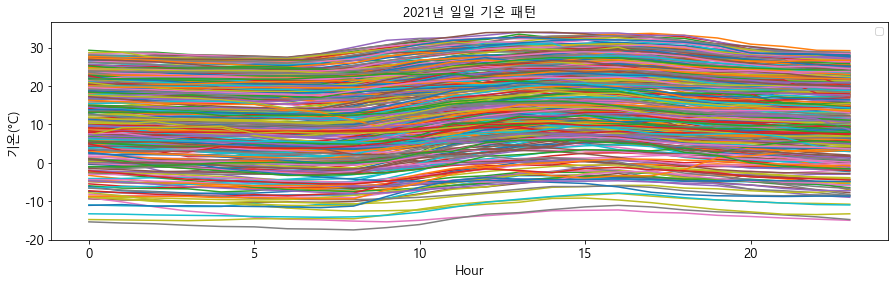

In [58]:
# 기온 패턴 그리기
df2_T.transpose().plot(figsize=(15,4), fontsize = 13)
plt.legend([])
plt.xlabel('Hour', fontsize = 13)
plt.ylabel('기온(°C)', fontsize = 13)
plt.title('2021년 일일 기온 패턴', fontsize = 13)

Text(0.5, 1.0, '2021년 일일 일사량 패턴')

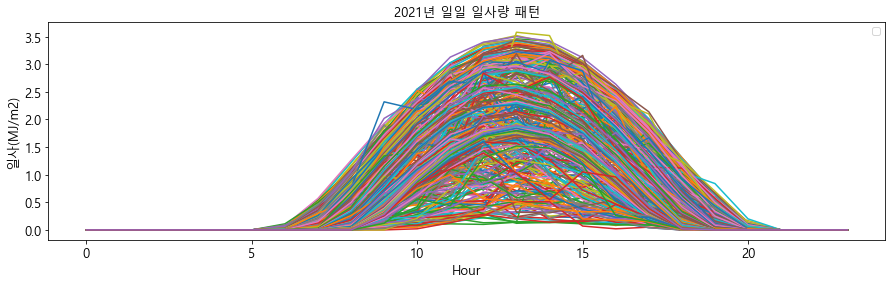

In [59]:
# 일사량 패턴 그리기
df2_I.transpose().plot(figsize=(15,4), fontsize = 13)
plt.legend([])
plt.xlabel('Hour', fontsize = 13)
plt.ylabel('일사(MJ/m2)', fontsize = 13)
plt.title('2021년 일일 일사량 패턴', fontsize = 13)